# Tutorial 0: Basic examples

In [1]:
import warnings
import sys
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins
import synthcity.logger as log

log.add(sink=sys.stderr, level="INFO")

X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## List the available generative models

In [2]:
from synthcity.plugins import Plugins

Plugins().list()

['dummy_sampler',
 'bayesian_network',
 'privbayes',
 'marginal_distributions',
 'uniform_sampler']

## Load and train a generative model

In [3]:
from synthcity.plugins import Plugins

syn_model = Plugins().get("marginal_distributions")

syn_model.fit(X)

## Generate new data using the model

In [4]:
syn_model.generate(count = 10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.010463,0.050680,0.131507,-0.029110,-0.062476,0.040378,0.030215,-0.044901,-0.023491,0.117591,321.932932
1,-0.003137,0.050680,-0.071323,-0.072115,-0.066093,0.151853,-0.001027,0.116759,0.007949,-0.015659,29.035312
2,0.083834,-0.044642,0.160505,0.053097,0.115398,0.099650,-0.052708,0.065196,-0.073544,-0.006949,284.688355
3,0.056780,0.050680,0.147012,-0.051405,-0.001131,-0.042852,0.055543,0.092464,-0.056437,-0.031229,336.309857
4,0.066215,-0.044642,-0.012699,-0.100015,0.035273,-0.067054,0.100906,-0.036139,0.126280,0.067522,88.789731
5,-0.004948,-0.044642,-0.017938,0.085271,0.145173,0.151615,0.042713,0.116304,0.054282,0.100722,88.467458
6,-0.041806,0.050680,0.170426,0.085314,0.099713,0.164263,0.179326,0.130566,0.087633,0.108358,58.363432
7,-0.050244,-0.044642,-0.015171,0.123785,0.081954,0.119581,0.155945,-0.000626,0.091216,0.062641,239.312197
8,-0.083548,0.050680,0.169863,0.056361,0.000264,0.004951,-0.033334,0.057444,0.027641,0.115745,84.193505
9,0.020585,0.050680,-0.006334,0.020259,0.117725,0.026308,0.148272,0.142789,0.077032,0.019628,131.109492


## Generate new data under some constraints

In [5]:
# Constraint: target <= 100
from synthcity.plugins.core.constraints import Constraints

constraints = Constraints(rules = [("target", "<=", 100)])

generated = syn_model.generate(count = 10, constraints = constraints)

assert (generated["target"] <= 100).any()

generated

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.218904e+08
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.224244e+09
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.396918e+08
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.274543e+09
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.006175e+09
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.705413e+09
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.110546e+09
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.920451e+09
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.119330e+09
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.885881e+08


In [6]:
# Constraint: target > 150

from synthcity.plugins.core.constraints import Constraints

constraints = Constraints(rules = [("target", ">", 150)])

generated = syn_model.generate(count = 10, constraints = constraints)

assert (generated["target"] > 150).any()

generated

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.714597e+09
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.957321e+09
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.191297e+09
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.228688e+07
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.740647e+08
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.492220e+09
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.331318e+08
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.745425e+09
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.459243e+09
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.116019e+09


## Plot real-synthetic distributions

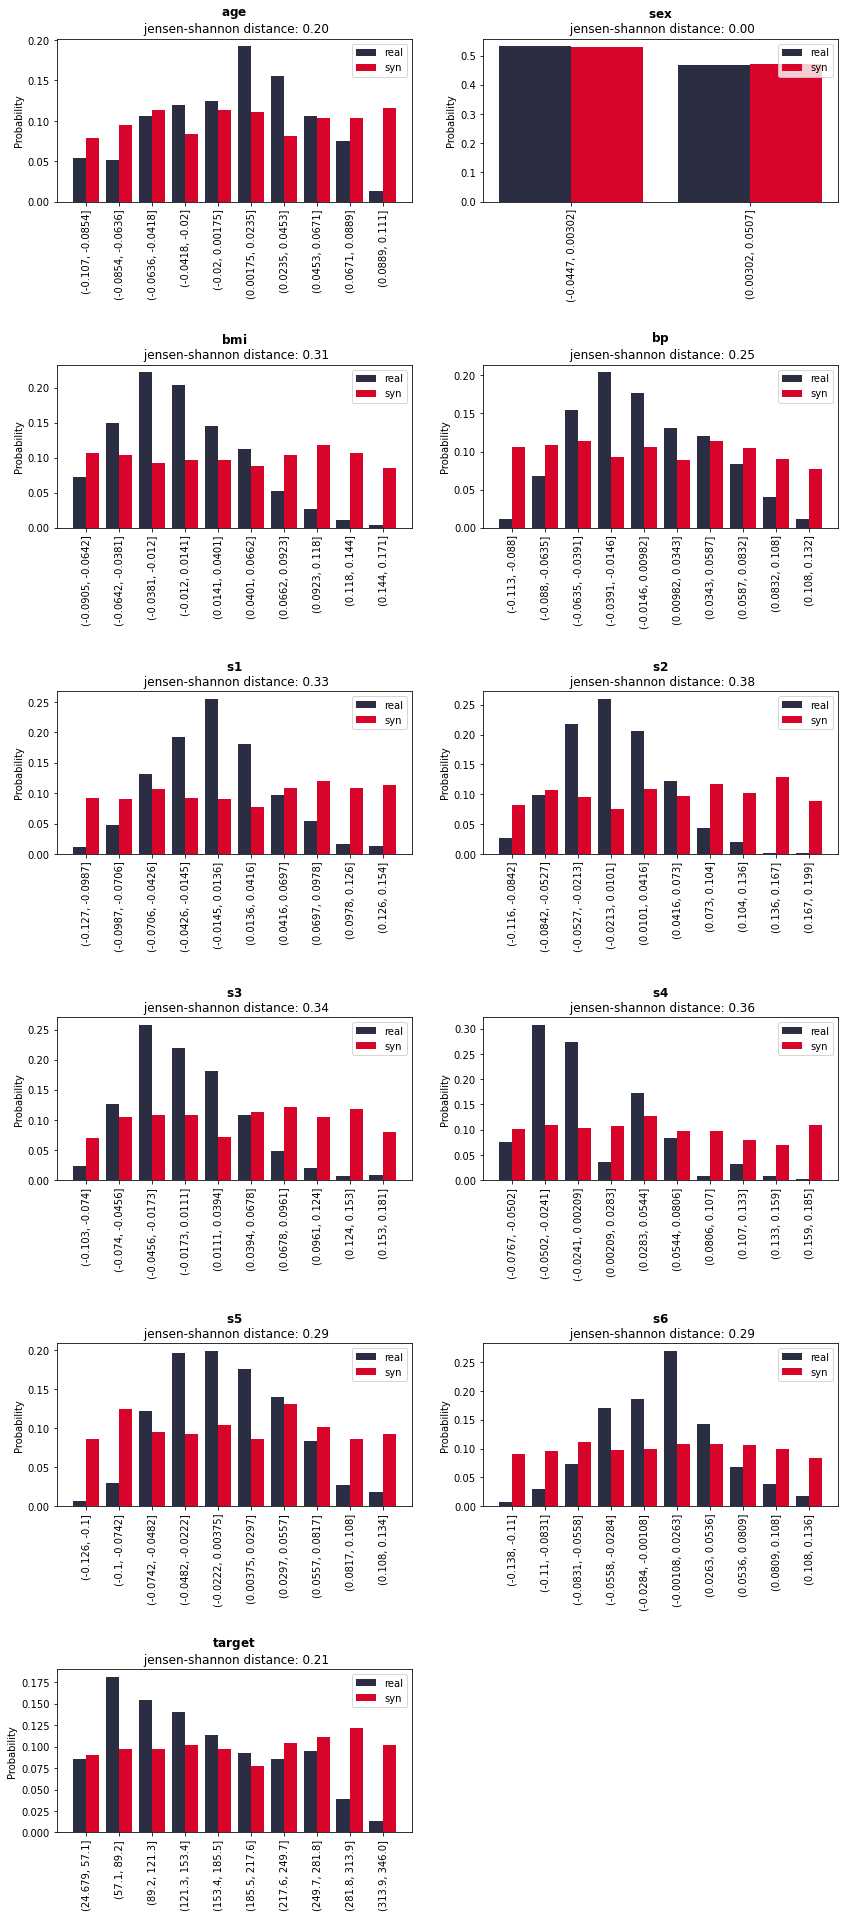

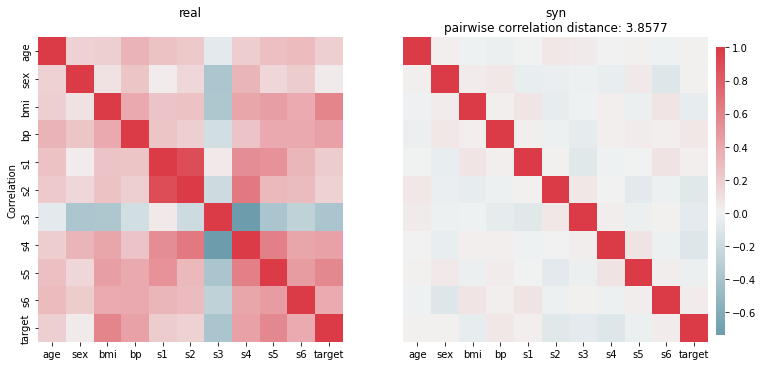

In [7]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

## Benchmark the quality of plugins

In [9]:
from synthcity.benchmark import Benchmarks
constraints = Constraints(rules = [("target", "ge", 150)])

score = Benchmarks.evaluate(
    ["marginal_distributions", "dummy_sampler"],
    X,
    sensitive_columns = ["sex"],
    synthetic_size = 1000,
    synthetic_constraints = constraints,
    repeats = 5,
)


[2022-03-24T20:09:50.070678+0000][1004208][INFO] Benchmarking plugin : marginal_distributions
[2022-03-24T20:09:50.072561+0000][1004208][INFO]  Experiment repeat: 0
[2022-03-24T20:10:13.268277+0000][1004208][INFO]  Experiment repeat: 1
[2022-03-24T20:10:35.807483+0000][1004208][INFO]  Experiment repeat: 2
[2022-03-24T20:10:59.737932+0000][1004208][INFO]  Experiment repeat: 3
[2022-03-24T20:11:23.147283+0000][1004208][INFO]  Experiment repeat: 4
[2022-03-24T20:11:47.088032+0000][1004208][INFO] Benchmarking plugin : dummy_sampler
[2022-03-24T20:11:47.088640+0000][1004208][INFO]  Experiment repeat: 0
[2022-03-24T20:12:13.360211+0000][1004208][INFO]  Experiment repeat: 1
[2022-03-24T20:12:35.959873+0000][1004208][INFO]  Experiment repeat: 2
[2022-03-24T20:12:58.881829+0000][1004208][INFO]  Experiment repeat: 3
[2022-03-24T20:13:24.929513+0000][1004208][INFO]  Experiment repeat: 4


In [10]:
Benchmarks.print(score)


Plugin : marginal_distributions


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0.0
sanity.common_rows_proportion,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0.01
sanity.avg_distance_nearest_neighbor,0.603946,0.603946,0.603946,0.0,0.603946,0.0,5,0,0.01
sanity.inlier_probability,0.052036,0.052036,0.052036,0.0,0.052036,0.0,5,0,0.01
sanity.outlier_probability,0.266968,0.266968,0.266968,0.0,0.266968,0.0,5,0,0.02
statistical.inverse_kl_divergence,0.055061,0.055061,0.055061,0.0,0.055061,0.0,5,0,0.03
statistical.kolmogorov_smirnov_test,0.409297,0.409297,0.409297,0.0,0.409297,0.0,5,0,0.08
statistical.chi_squared_test,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0.03
statistical.maximum_mean_discrepancy,0.009774,0.009774,0.009774,0.0,0.009774,0.0,5,0,0.1
statistical.inverse_cdf_distance,0.327206,0.332824,0.329069,0.001949,0.328605,0.000615,5,0,0.99




Plugin : dummy_sampler


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0.0
sanity.common_rows_proportion,0.454751,0.461538,0.457919,0.002307,0.457014,0.002262,5,0,0.01
sanity.avg_distance_nearest_neighbor,0.253648,0.253671,0.253657,0.000008,0.253655,0.000008,5,0,0.01
sanity.inlier_probability,0.565611,0.565611,0.565611,0.0,0.565611,0.0,5,0,0.01
sanity.outlier_probability,0.047511,0.047511,0.047511,0.0,0.047511,0.0,5,0,0.01
statistical.inverse_kl_divergence,0.781438,0.79323,0.786142,0.003868,0.785209,0.001013,5,0,0.02
statistical.kolmogorov_smirnov_test,0.801709,0.815633,0.807127,0.004898,0.806379,0.00547,5,0,0.03
statistical.chi_squared_test,0.360491,0.363006,0.361532,0.001148,0.360781,0.002333,5,0,0.02
statistical.maximum_mean_discrepancy,0.010545,0.011214,0.010934,0.000219,0.010949,0.000109,5,0,0.07
statistical.inverse_cdf_distance,2.241976,2.332675,2.298256,0.031107,2.306088,0.025543,5,0,6.53


# 